### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.semi_supervised import LabelPropagation
from sklearn.linear_model import LinearRegression

### Generate Synthetic Data 

In [2]:
# Generate random data
np.random.seed(0)
size = np.random.randint(1000, 3500, 100)  # House sizes in square feet
bedrooms = np.random.randint(1, 5, 100)    # Number of bedrooms

# Generate house prices (only for some data points)
prices = (size * 300) + (bedrooms * 10000) + np.random.randint(20000, 50000, 100)  # House prices
labels = -1 * np.ones(size.shape[0])  # Initialize all labels as -1 (unlabeled)

# Label a few data points
labeled_indices = np.random.choice(size.shape[0], size=10, replace=False)
labels[labeled_indices] = prices[labeled_indices]


### Apply Label Propagation

In [4]:
# We'll propagate the few known labels to the rest of the data.
# Combine features into a single array
features = np.column_stack((size, bedrooms))

# Apply Label Propagation
label_prop_model = LabelPropagation()
label_prop_model.fit(features, labels)

# Predict the labels for all data points
propagated_labels = label_prop_model.transduction_

# Output the propagated labels for visualization
print(f"Original Labels: {labels[labeled_indices]}")
print(f"Propagated Labels for Unlabeled Data:\n{propagated_labels}")

Original Labels: [ 883205.  381751.  753189.  775461.  602197.  559887.  638586.  978797.
  932419. 1103927.]
Propagated Labels for Unlabeled Data:
[ 381751.  638586.  381751.  381751.  381751.  381751.  883205.  381751.
  381751.  381751.  381751.  381751.  381751.  381751.  381751.  381751.
  381751.  381751.  602197.  381751.  381751.  381751.  381751.  381751.
  602197.  381751.  381751.  381751.  559887.  381751.  381751.  381751.
  381751.  381751.  978797.  381751.  381751.  381751.  381751.  932419.
  602197.  381751.  381751.  381751.  381751.  775461.  381751.  381751.
  381751.  381751.  381751.  381751.  381751.  932419.  381751.  381751.
  381751.  381751.  381751.  381751.  381751.  559887.  381751.  381751.
  381751.  381751.  381751.  381751.  381751.  381751.  381751.  381751.
  381751.  381751.  381751.  381751.  775461.  381751.  381751.  753189.
  381751.  381751. 1103927.  381751.  381751.  381751.  381751.  381751.
 1103927.  381751.  932419.  381751.  381751.  38

### Train a Linear Regression Model on the Labeled Data

In [17]:
propagated_labels[propagated_labels!=1]

array([ 381751.,  638586.,  381751.,  381751.,  381751.,  381751.,
        883205.,  381751.,  381751.,  381751.,  381751.,  381751.,
        381751.,  381751.,  381751.,  381751.,  381751.,  381751.,
        602197.,  381751.,  381751.,  381751.,  381751.,  381751.,
        602197.,  381751.,  381751.,  381751.,  559887.,  381751.,
        381751.,  381751.,  381751.,  381751.,  978797.,  381751.,
        381751.,  381751.,  381751.,  932419.,  602197.,  381751.,
        381751.,  381751.,  381751.,  775461.,  381751.,  381751.,
        381751.,  381751.,  381751.,  381751.,  381751.,  932419.,
        381751.,  381751.,  381751.,  381751.,  381751.,  381751.,
        381751.,  559887.,  381751.,  381751.,  381751.,  381751.,
        381751.,  381751.,  381751.,  381751.,  381751.,  381751.,
        381751.,  381751.,  381751.,  381751.,  775461.,  381751.,
        381751.,  753189.,  381751.,  381751., 1103927.,  381751.,
        381751.,  381751.,  381751.,  381751., 1103927.,  3817

In [5]:
# We'll use the propagated labels to train a linear regression model.
# Select data points with propagated labels
labeled_data_indices = propagated_labels != -1
X_train = features[labeled_data_indices]
y_train = propagated_labels[labeled_data_indices]

# Train the Linear Regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)


LinearRegression()

### Predict and Plot

In [14]:
features[labeled_indices, 0]

array([2778, 1091, 2316, 2466, 1756, 1639, 1835, 3076, 2930, 3431])

In [18]:
labels

array([-1.000000e+00,  6.385860e+05, -1.000000e+00, -1.000000e+00,
       -1.000000e+00, -1.000000e+00,  8.832050e+05, -1.000000e+00,
       -1.000000e+00, -1.000000e+00, -1.000000e+00, -1.000000e+00,
       -1.000000e+00, -1.000000e+00, -1.000000e+00, -1.000000e+00,
       -1.000000e+00, -1.000000e+00, -1.000000e+00, -1.000000e+00,
       -1.000000e+00, -1.000000e+00, -1.000000e+00, -1.000000e+00,
       -1.000000e+00, -1.000000e+00, -1.000000e+00, -1.000000e+00,
       -1.000000e+00, -1.000000e+00, -1.000000e+00, -1.000000e+00,
       -1.000000e+00, -1.000000e+00,  9.787970e+05, -1.000000e+00,
       -1.000000e+00, -1.000000e+00, -1.000000e+00, -1.000000e+00,
        6.021970e+05, -1.000000e+00, -1.000000e+00, -1.000000e+00,
       -1.000000e+00,  7.754610e+05, -1.000000e+00, -1.000000e+00,
       -1.000000e+00, -1.000000e+00, -1.000000e+00, -1.000000e+00,
        3.817510e+05, -1.000000e+00, -1.000000e+00, -1.000000e+00,
       -1.000000e+00, -1.000000e+00, -1.000000e+00, -1.000000e

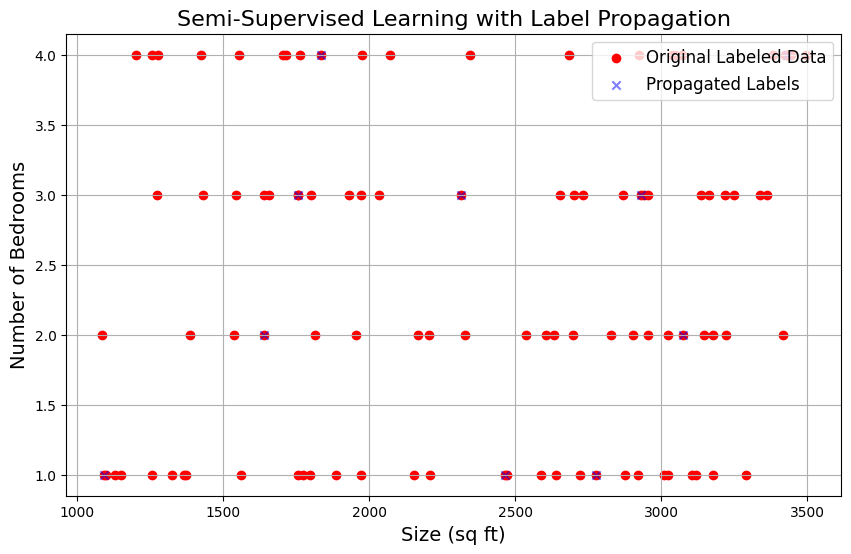

In [20]:
# We'll plot the original labeled data, the propagated labels, and use the model to predict prices for new data.
# Step 4: Plot the Data with Labels
plt.figure(figsize=(10, 6))

# Plot original labeled data with red circles
plt.scatter(size, bedrooms,c='red', marker='o', label='Original Labeled Data')

labels[labeled_indices]
# Plot data with propagated labels with blue crosses
plt.scatter(features[labeled_indices, 0], features[labeled_indices, 1], c='blue', marker='x', label='Propagated Labels', alpha=0.5)

# Add labels and title
plt.xlabel("Size (sq ft)", fontsize=14)
plt.ylabel("Number of Bedrooms", fontsize=14)
plt.title("Semi-Supervised Learning with Label Propagation", fontsize=16)

# Add a legend
plt.legend(loc='upper right', fontsize=12)

plt.grid(True)
plt.show()

In [21]:
# # Predicting on New Data
new_data = np.array([[2200, 3]])  # New data point
new_price_prediction = lin_reg_model.predict(new_data)

print(f"Predicted price for new house with size {new_data[0][0]} sq ft and {new_data[0][1]} bedrooms: ${new_price_prediction[0]:,.2f}")

Predicted price for new house with size 2200 sq ft and 3 bedrooms: $463,892.25


### End of Notebook